In [1]:
import cv2
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pathlib import Path

import pathlib
import pandas as pd

from XRayDataset import XRayDataset

In [2]:
pwd()

'/home/lisettesolis/30254-pneumoniacs/predict-pneumonia'

In [3]:
# using cv2
# read in the image

img = cv2.imread("data/test/PNEUMONIA/person1_virus_11.jpeg", cv2.IMREAD_UNCHANGED)
print(img.shape)
print(type(img.shape))

(560, 872)
<class 'tuple'>


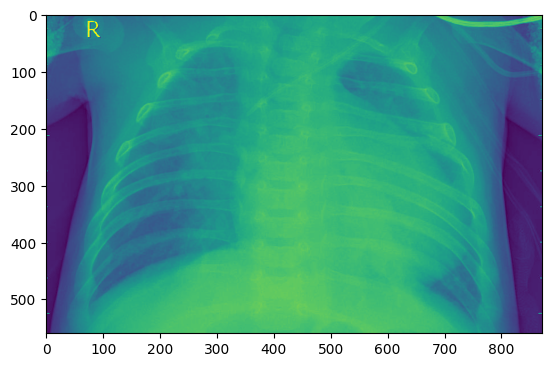

In [4]:
plt.imshow(img)

In [15]:
train_dataset = XRayDataset('data/csv_files/train.csv')
image, label = train_dataset.__getitem__(3)
print(image.shape)
print(label)
print(type(image))

torch.Size([1, 1495, 1854])
NORMAL
<class 'torch.Tensor'>


In [9]:
[train_dataset.data['ratio'].mean()]*3

[0.7146625766871166, 0.7146625766871166, 0.7146625766871166]

In [10]:
train_dataset.data['ratio'].std()

0.11852999113579582

In [11]:
img

array([[136, 130, 121, ..., 162, 184, 201],
       [137, 131, 123, ..., 193, 188, 185],
       [136, 131, 123, ..., 187, 196, 203],
       ...,
       [ 12,  11,  12, ...,  23,  21,  24],
       [ 11,  11,  12, ...,  23,  21,  24],
       [ 11,  11,  12, ...,  23,  21,  24]], dtype=uint8)

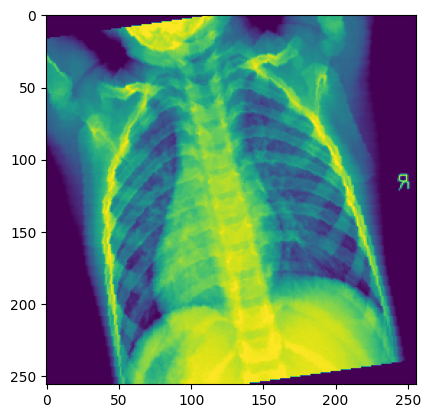

In [14]:
length = train_dataset.data['length'].mean()
ratio = train_dataset.data['ratio'].mean()

transforms = T.Compose([
    T.ToPILImage(),
    T.Grayscale(num_output_channels=1),
    T.Resize((256, 256)),
    T.RandomHorizontalFlip(),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

tensor = transforms(image)
# print(tensor)
# print(tensor.shape)

plt.imshow(tensor.permute(1, 2, 0))